# LENDING CASE STUDY

In [59]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Importing the file through pandas and storing it in Dataframe

df = pd.read_csv('loan.csv')

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
# Checking the column names
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [6]:
# Checking the shape of the dataframe
df.shape

(39717, 111)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [8]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

# Data Cleaning

## We could lot of columns which are entirely null we can go ahead and drop them from datafame

In [9]:
# Removing the null columns from dataframe

df.dropna(axis= 1,how ='all',inplace=True )

In [10]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [11]:
## After removing null columns we have left with 57 columns
df.shape

(39717, 57)

In [12]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [13]:
# checking columns where there are single values in columns, which are not helpful for our use case for analysis
single_value_column =[]

for i in df.columns:
    if df[i].nunique()==1:
        single_value_column.append(i)

In [14]:
# check the name of single value column names
for i in single_value_column:
    print(i)

pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
application_type
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens


In [15]:
# Removing the single value columns from dataframe

df.drop(single_value_column,axis=1,inplace=True)

In [16]:
df.shape

(39717, 48)

In [18]:
description = pd.read_excel('Data_Dictionary.xlsx').dropna()
description.style.set_properties(subset=['Description'], **{'width' :'850px'})

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


## Removing irrelavant columns and columns which consist post approval data

- Columns (id, member_id) will be dropped as they are index variables with unique values and do not contribute to the analysis.

- Columns (emp_title, desc, title) will be dropped as they contain descriptive text (nouns) and do not contribute to the analysis.

- The redundant column (url) will be dropped. Further analysis reveals that the URL is a static path with the loan ID appended as a query, making it redundant compared to the (id) column.

- Customer behavior columns that represent data post the approval of loans will not be considered in the analysis and will be dropped.


- These columns capture customer behavior recorded after loan approval and are not available at the time of loan approval. Thus, these variables will not be included in the analysis.

- Columns to be dropped: (delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, application_type)

In [20]:
# List the columns which are not required for the analysis. 
# These columns are like id, member_id, URL ,Total 27 columns
drop_cols = [
 'collection_recovery_fee',
 'delinq_2yrs',
 'desc',
 'earliest_cr_line',
 'emp_title',
 'id',
 'inq_last_6mths',
 'last_credit_pull_d',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'member_id',
 'open_acc',
 'out_prncp',
 'out_prncp_inv',
 'pub_rec',
 'recoveries',
 'revol_bal',
 'revol_util',
 'title',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rec_prncp',
 'url',
 'zip_code'
]

df.drop(drop_cols, axis = 1, inplace = True)

In [21]:
df.shape

(39717, 21)

In [23]:
df.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [24]:
# As we can see from above that in 'pub_rec_bankruptcies' have around 37339 entires as 0, it will be not much of a use.
# Hence removing the colum

df.drop('pub_rec_bankruptcies', axis = 1, inplace = True)

In [25]:
df.shape

(39717, 20)

In [26]:
# There are various columns where records are missing for more than 65%, this is not going to help our analysis rather it is better to remove them

for col in df.columns:
    missing_values = round(df[col].isna().sum() / df.shape[0], 2)
    if missing_values >= 0.65:
        df.drop(col, axis = 1, inplace = True)
        
df.shape

        

(39717, 17)

In [50]:
# Dropping columns where loan status is current, as the loan in progress will not provide us any insight whether person will
# default or not
df = df[df['loan_status'].str.lower() != "current"]
df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [28]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti'],
      dtype='object')

In [41]:
#Sorting the dataframe columns in ascending order to address all columns alphabetically
df = df.reindex(sorted(df.columns), axis=1)
df.head()

,addr_state,annual_inc,dti,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,installment,int_rate,issue_d,loan_amnt,loan_status,purpose,sub_grade,term,verification_status
0,AZ,24000.0,27.65,10,5000,4975.0,B,RENT,162.87,10.65%,Dec-11,5000,Fully Paid,credit_card,B2,36 months,Verified
1,GA,30000.0,1.00,0,2500,2500.0,C,RENT,59.83,15.27%,Dec-11,2500,Charged Off,car,C4,60 months,Source Verified
2,IL,12252.0,8.72,10,2400,2400.0,C,RENT,84.33,15.96%,Dec-11,2400,Fully Paid,small_business,C5,36 months,Not Verified
3,CA,49200.0,20.00,10,10000,10000.0,C,RENT,339.31,13.49%,Dec-11,10000,Fully Paid,other,C1,36 months,Source Verified
5,AZ,36000.0,11.20,3,5000,5000.0,A,RENT,156.46,7.90%,Dec-11,5000,Fully Paid,wedding,A4,36 months,Source Verified


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   addr_state           38577 non-null  object 
 1   annual_inc           38577 non-null  float64
 2   dti                  38577 non-null  float64
 3   emp_length           38577 non-null  int64  
 4   funded_amnt          38577 non-null  int64  
 5   funded_amnt_inv      38577 non-null  float64
 6   grade                38577 non-null  object 
 7   home_ownership       38577 non-null  object 
 8   installment          38577 non-null  float64
 9   int_rate             38577 non-null  object 
 10  issue_d              38577 non-null  object 
 11  loan_amnt            38577 non-null  int64  
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  sub_grade            38577 non-null  object 
 15  term                 38577 non-null 

In [42]:
# we can see there are some null values in emp_length
df.emp_length.value_counts()

10    9521
0     4508
2     4291
3     4012
4     3342
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

In [31]:
# Mode of emp_length
df.emp_length.mode()[0]

'10+ years'

In [32]:
# As we can see mode is 10+ years and it is almost twice the occurence of second most frequent value. 
#hence we can assign this value to null values in emp_length
# the missing values are also very low in number imputing it, won't cause any biasis

df.emp_length.fillna(df.emp_length.mode()[0], inplace = True)

In [33]:
df.emp_length.isna().sum()

0

In [34]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  object 
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_length           38577 non-null  object 
 9   home_ownership       38577 non-null  object 
 10  annual_inc           38577 non-null  float64
 11  verification_status  38577 non-null  object 
 12  issue_d              38577 non-null  object 
 13  loan_status          38577 non-null  object 
 14  purpose              38577 non-null  object 
 15  addr_state           38577 non-null 

In [36]:
 # Coverting emp_length to numeric as we can do some analysis
 # In "emp_length" --> { (< 1 year) is assumed as 0 and 10+ years is assumed as 10 }
df.emp_length = pd.to_numeric(df.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [37]:
df.emp_length

0        10
1         0
2        10
3        10
5         3
         ..
39712     4
39713     3
39714     0
39715     0
39716     0
Name: emp_length, Length: 38577, dtype: int64

In [43]:
df.dtypes

addr_state              object
annual_inc             float64
dti                    float64
emp_length               int64
funded_amnt              int64
funded_amnt_inv        float64
grade                   object
home_ownership          object
installment            float64
int_rate                object
issue_d                 object
loan_amnt                int64
loan_status             object
purpose                 object
sub_grade               object
term                    object
verification_status     object
dtype: object

In [44]:
df.issue_d.head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [45]:
## Converting the column issue_d from string to DateTime
df['issue_d'] = pd.to_datetime(df['issue_d'], format = '%b-%y')

In [47]:
df.issue_d.head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
5   2011-12-01
Name: issue_d, dtype: datetime64[ns]

-  Our main usecase if that we need to analyse the customer who have defaulted, hence it is best to dropped customer who have fully paid from data.

In [56]:
# Our main usecase if that we need to analyse the customer who have defaulted, hence it is best to dropped customer who have fully paid from data.
df = df[df['loan_status'].str.lower() != "fully paid"]


In [57]:
df.loan_status.unique()

array(['Charged Off'], dtype=object)

In [61]:
df.head()

,addr_state,annual_inc,dti,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,installment,int_rate,issue_d,loan_amnt,loan_status,purpose,sub_grade,term,verification_status
1,GA,30000.0,1.00,0,2500,2500.0,C,RENT,59.83,15.27%,2011-12-01,2500,Charged Off,car,C4,60 months,Source Verified
8,CA,40000.0,5.55,4,5600,5600.0,F,OWN,152.39,21.28%,2011-12-01,5600,Charged Off,small_business,F2,60 months,Source Verified
9,TX,15000.0,18.08,0,5375,5350.0,B,RENT,121.45,12.69%,2011-12-01,5375,Charged Off,other,B5,60 months,Verified
12,VA,30000.0,10.08,0,9000,9000.0,C,RENT,305.38,13.49%,2011-12-01,9000,Charged Off,debt_consolidation,C1,36 months,Source Verified
14,CA,100000.0,7.06,3,10000,10000.0,B,RENT,325.74,10.65%,2011-12-01,10000,Charged Off,other,B2,36 months,Source Verified


## Outlier Treatment

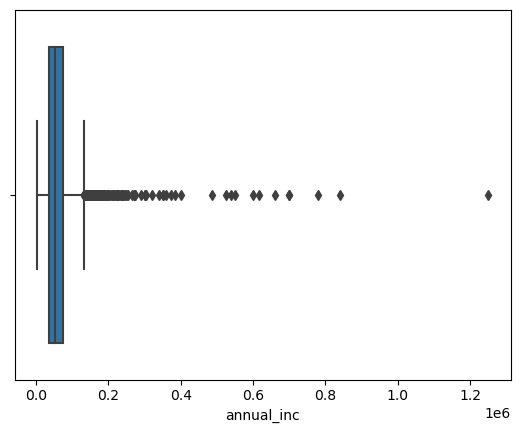

In [62]:
# let do outlier treatment on annual income of customer who have defaulted

sns.boxplot(df['annual_inc'])
plt.show()

- We can clearly see the presence of outliers.
- We will check the quantiles and remove them from dataframe
- The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
- let's keep the threshold for removing outliers as 0.95

In [63]:
# Let's check the quantile info 
quantile_info = df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     53000.00
0.75     75000.00
0.90    103020.00
0.95    129697.20
0.97    150000.00
0.98    171483.84
0.99    205960.00
Name: annual_inc, dtype: float64

In [64]:
# we can will remove outlier from annual income

df = df[df.annual_inc <= 129697.20]

In [65]:
df.shape

(5345, 17)

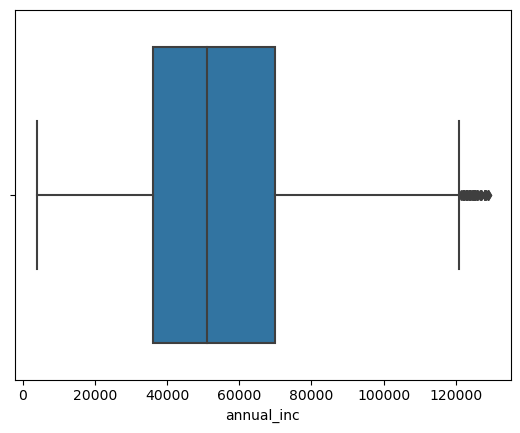

In [66]:

sns.boxplot(df['annual_inc'])
plt.show()

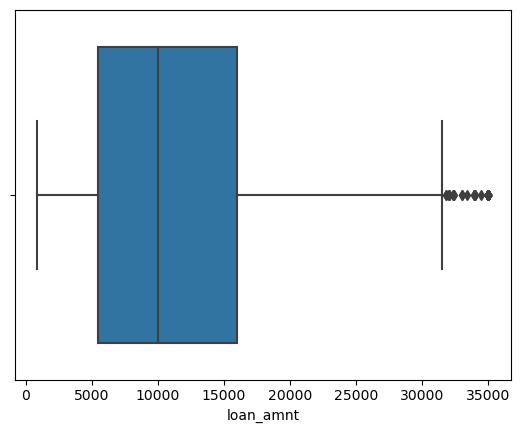

In [67]:
# let do outlier treatment on loan of customer who have defaulted

sns.boxplot(df['loan_amnt'])
plt.show()

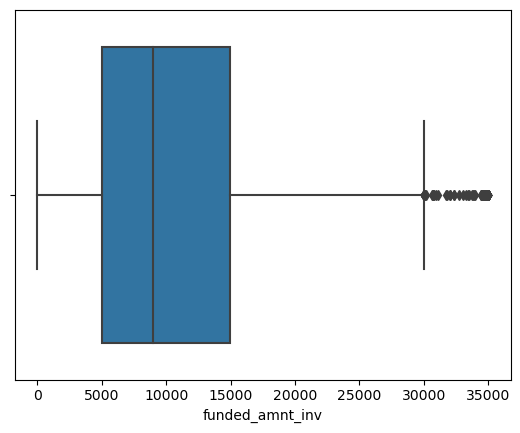

In [69]:
# let do outlier treatment on loan of customer who have defaulted

sns.boxplot(df['funded_amnt_inv'])
plt.show()

In [70]:
# we can see there are very few outlier and as per box plot the data is mostly fairly distributed, hence we can leave it.